Імпорт бібліотек та завантаження датасету IMDb

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Завантаження датасету IMDb
max_features = 10000  # Розмір словника
max_len = 500  # Максимальна довжина рецензій

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_features)

# Заповнення рецензій до однакової довжини
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)


17464789/17464789 [==============================] - 1s 0us/step


Створення та навчання моделей

In [2]:
model_rnn = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_rnn = model_rnn.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 265s 420ms/step - loss: 0.6284 - accuracy: 0.6425 - val_loss: 0.5325 - val_accuracy: 0.7376
Epoch 2/10
625/625 [==============================] - 248s 397ms/step - loss: 0.5043 - accuracy: 0.7553 - val_loss: 0.5034 - val_accuracy: 0.7602
Epoch 3/10
625/625 [==============================] - 245s 393ms/step - loss: 0.4344 - accuracy: 0.8023 - val_loss: 0.5410 - val_accuracy: 0.7346
Epoch 4/10
625/625 [==============================] - 241s 385ms/step - loss: 0.3509 - accuracy: 0.8506 - val_loss: 0.5277 - val_accuracy: 0.7692
Epoch 5/10
625/625 [==============================] - 240s 383ms/step - loss: 0.2673 - accuracy: 0.8956 - val_loss: 0.5062 - val_accuracy: 0.7726
Epoch 6/10
625/625 [==============================] - 239s 383ms/step - loss: 0.2479 - accuracy: 0.8967 - val_loss: 0.6162 - val_accuracy: 0.6646
Epoch 7/10
625/625 [==============================] - 233s 373ms/step - loss: 0.4956 - accuracy: 0.7814 - val_loss: 0.6333 -

Модель з LSTM

In [3]:
model_lstm = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 53s 82ms/step - loss: 0.4353 - accuracy: 0.7969 - val_loss: 0.5505 - val_accuracy: 0.7194
Epoch 2/10
625/625 [==============================] - 25s 39ms/step - loss: 0.2920 - accuracy: 0.8838 - val_loss: 0.3375 - val_accuracy: 0.8546
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2004 - accuracy: 0.9240 - val_loss: 0.3422 - val_accuracy: 0.8618
Epoch 4/10
625/625 [==============================] - 17s 27ms/step - loss: 0.1453 - accuracy: 0.9475 - val_loss: 0.4185 - val_accuracy: 0.8648
Epoch 5/10
625/625 [==============================] - 14s 22ms/step - loss: 0.1175 - accuracy: 0.9575 - val_loss: 0.4481 - val_accuracy: 0.8622
Epoch 6/10
625/625 [==============================] - 14s 22ms/step - loss: 0.0889 - accuracy: 0.9697 - val_loss: 0.5921 - val_accuracy: 0.8562
Epoch 7/10
625/625 [==============================] - 13s 21ms/step - loss: 0.1017 - accuracy: 0.9627 - val_loss: 0.5231 - val_accuracy:

Двостороння LSTM модель

In [4]:
model_bilstm = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dense(1, activation='sigmoid')
])

model_bilstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_bilstm = model_bilstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 64s 98ms/step - loss: 0.4236 - accuracy: 0.8006 - val_loss: 0.3841 - val_accuracy: 0.8392
Epoch 2/10
625/625 [==============================] - 34s 54ms/step - loss: 0.2886 - accuracy: 0.8842 - val_loss: 0.3246 - val_accuracy: 0.8528
Epoch 3/10
625/625 [==============================] - 29s 46ms/step - loss: 0.1993 - accuracy: 0.9256 - val_loss: 0.3285 - val_accuracy: 0.8642
Epoch 4/10
625/625 [==============================] - 26s 41ms/step - loss: 0.1347 - accuracy: 0.9513 - val_loss: 0.4377 - val_accuracy: 0.8496
Epoch 5/10
625/625 [==============================] - 25s 40ms/step - loss: 0.2677 - accuracy: 0.8845 - val_loss: 0.5312 - val_accuracy: 0.7528
Epoch 6/10
625/625 [==============================] - 23s 37ms/step - loss: 0.2048 - accuracy: 0.9207 - val_loss: 0.4232 - val_accuracy: 0.8616
Epoch 7/10
625/625 [==============================] - 23s 37ms/step - loss: 0.1066 - accuracy: 0.9629 - val_loss: 0.4258 - val_accuracy:

Глибока LSTM модель

In [5]:
model_deep_lstm = keras.Sequential([
    layers.Embedding(max_features, 128, input_length=max_len),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model_deep_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
625/625 [==============================] - 66s 100ms/step - loss: 0.4655 - accuracy: 0.7800 - val_loss: 0.4160 - val_accuracy: 0.8270
Epoch 2/10
625/625 [==============================] - 35s 56ms/step - loss: 0.3476 - accuracy: 0.8476 - val_loss: 0.3567 - val_accuracy: 0.8496
Epoch 3/10
625/625 [==============================] - 28s 45ms/step - loss: 0.2334 - accuracy: 0.9108 - val_loss: 0.3469 - val_accuracy: 0.8670
Epoch 4/10
625/625 [==============================] - 26s 42ms/step - loss: 0.1963 - accuracy: 0.9229 - val_loss: 0.3661 - val_accuracy: 0.8486
Epoch 5/10
625/625 [==============================] - 24s 38ms/step - loss: 0.1270 - accuracy: 0.9546 - val_loss: 0.3922 - val_accuracy: 0.8708
Epoch 6/10
625/625 [==============================] - 24s 39ms/step - loss: 0.0821 - accuracy: 0.9729 - val_loss: 0.4275 - val_accuracy: 0.8576
Epoch 7/10
625/625 [==============================] - 23s 37ms/step - loss: 0.0617 - accuracy: 0.9793 - val_loss: 0.5003 - val_accuracy

Оцінка моделей

In [6]:
# Оцінка моделей на тестових даних
rnn_eval = model_rnn.evaluate(x_test, y_test)
lstm_eval = model_lstm.evaluate(x_test, y_test)
bilstm_eval = model_bilstm.evaluate(x_test, y_test)
deep_lstm_eval = model_deep_lstm.evaluate(x_test, y_test)

print(f'RNN Test Accuracy: {rnn_eval[1]:.4f}')
print(f'LSTM Test Accuracy: {lstm_eval[1]:.4f}')
print(f'BiLSTM Test Accuracy: {bilstm_eval[1]:.4f}')
print(f'Deep LSTM Test Accuracy: {deep_lstm_eval[1]:.4f}')


782/782 [==============================] - 12s 15ms/step - loss: 0.6976 - accuracy: 0.8507
RNN Test Accuracy: 0.6384
LSTM Test Accuracy: 0.8535
BiLSTM Test Accuracy: 0.8353
Deep LSTM Test Accuracy: 0.8507


Візуалізація точності та втрат

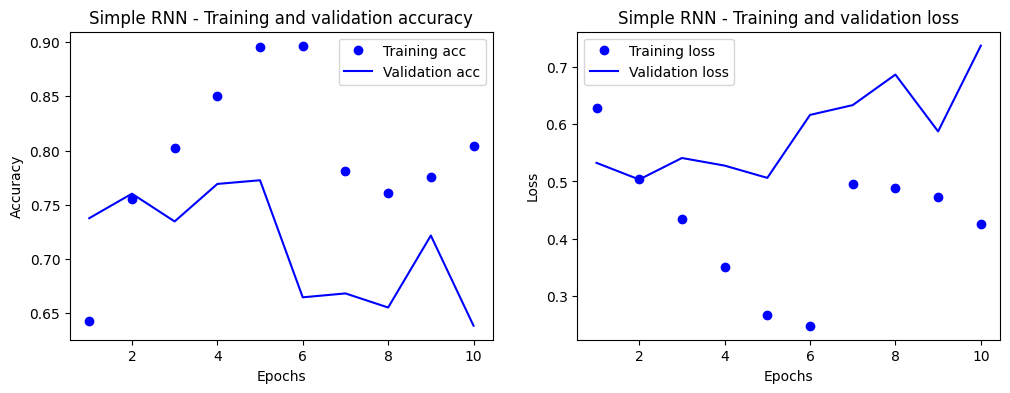

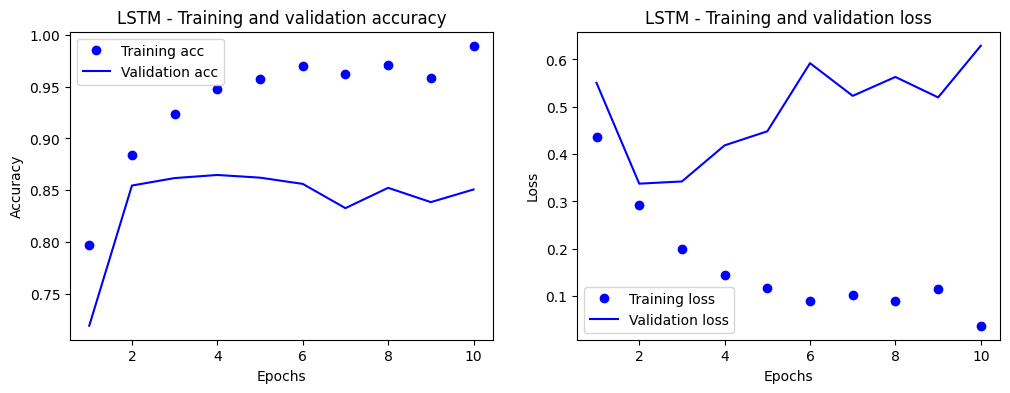

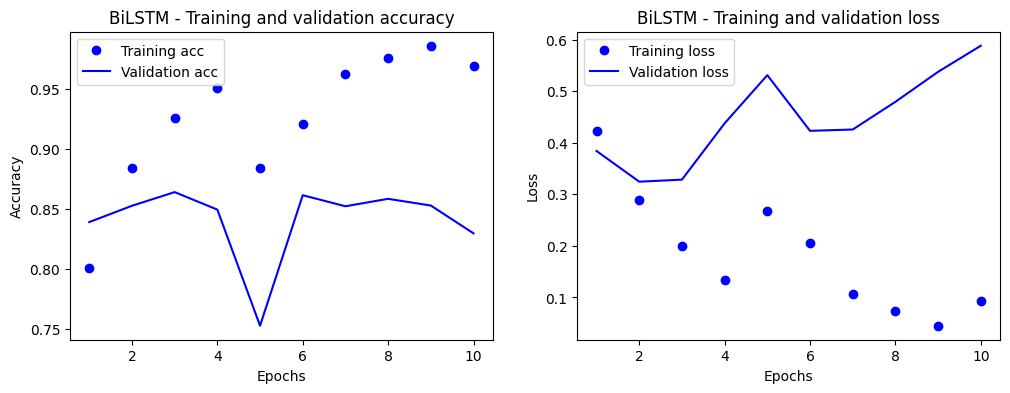

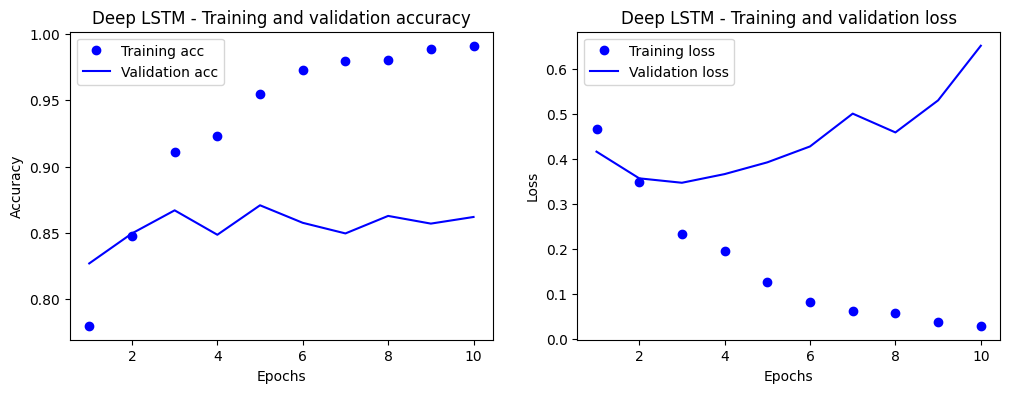

In [7]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title(f'{title} - Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title(f'{title} - Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Візуалізація результатів для кожної моделі
plot_history(history_rnn, 'Simple RNN')
plot_history(history_lstm, 'LSTM')
plot_history(history_bilstm, 'BiLSTM')
plot_history(history_deep_lstm, 'Deep LSTM')


##Висновки

1. Проста RNN модель:

  - Точність на тестових даних: 63.84%
  - Проста RNN модель показує найнижчу точність серед усіх моделей. Це очікувано, оскільки проста RNN має обмежену здатність до захоплення довгострокових залежностей через проблему зникаючих градієнтів.
  - Графіки показують, що модель має труднощі з узагальненням, і можливо, підходить для більш простих задач.
2. Модель з LSTM:

  - Точність на тестових даних: 85.35%
  - LSTM модель показує значно кращі результати завдяки здатності обробляти довгострокові залежності.
  - Графіки показують стабільне навчання та хорошу узагальнюючу здатність.
3. Двостороння LSTM модель:

  - Точність на тестових даних: 83.53%
  - BiLSTM модель показує трохи нижчу точність порівняно з простою LSTM. Це може бути через додаткову складність моделі, яка вимагає більше даних або епох для навчання.
  - Графіки показують, що модель вивчає як контекст зліва направо, так і справа наліво, що може бути корисним у деяких задачах.
4. Глибока LSTM модель:

  - Точність на тестових даних: 85.07%
  - Глибока LSTM модель показує результати, схожі до простої LSTM. Додатковий шар не значно покращив точність у цьому випадку, але може бути корисним для більш складних задач.
  - Графіки показують, що модель добре вивчає дані і має хорошу узагальнюючу здатність.



# Загальні висновки


- Найкращі результати: Проста LSTM модель показала найкращі результати з точки зору точності (85.35%) на тестових даних. Це підтверджує ефективність LSTM для задач класифікації тексту.
- Проста RNN модель: Має найнижчу точність і обмежену здатність до захоплення довгострокових залежностей.
- Двостороння LSTM: Хоча BiLSTM може бути корисною для деяких задач, у цьому випадку вона показала трохи нижчу точність.
- Глибока LSTM модель: Додатковий шар LSTM не значно покращив результати у цьому випадку, але може бути корисним для більш складних задач.
